In [1]:
import yaml
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def YAML_parser(data_index, path = "timeloop-metric.ERT_summary.yaml"):
    with open(path, 'r') as stream:
        data_loaded = yaml.safe_load(stream)
    energy3 = 0
    if data_index == 0:    
        for data in data_loaded['ERT_summary']['table_summary'][0]['actions']:
            if(data['name'] == 'read'):
                energy1= data['max_energy']
            if(data['name'] == 'write'):
                energy2 = data['max_energy']
    
    elif data_index == 1:    
        for data in data_loaded['ERT_summary']['table_summary'][1]['actions']:
            if(data['name'] == 'mac_random'):
                energy1 = data['energy']
            if(data['name'] == 'mac_reused'):
                energy2 = data['energy']
            if(data['name'] == 'mac_gated'):
                energy3= data['energy']
                
    elif data_index == 2:    
        for data in data_loaded['ERT_summary']['table_summary'][2]['actions']:
            if(data['name'] == 'read'):
                energy1 = data['max_energy']
            if(data['name'] == 'write'):
                energy2 = data['max_energy']
          
    elif data_index == 3:    
        for data in data_loaded['ERT_summary']['table_summary'][3]['actions']:
            if(data['name'] == 'read'):
                energy1 = data['energy']
            if(data['name'] == 'write'):
                energy2 = data['energy']
                
    else:
        raise Exeption("Index Invalide")
    return energy1, energy2, energy3

In [3]:
command = "timeloop-metrics arch.yaml" + " >/dev/null 2>&1"

In [4]:
dram_width_default = 256
sram_depth_default = 8192
sram_width_default = 256
regfile_depth_default = 64
regfile_width_default = 8
datawidth_default = 8
default_path  =  "arch_base.yaml"

In [5]:
def YAML_generator(dram_width = dram_width_default, sram_depth = sram_depth_default,
                   sram_width = sram_width_default, regfile_depth = regfile_depth_default, 
                   regfile_width = regfile_width_default, datawidth=datawidth_default,
                   path="arch_base.yaml"):
    with open(path,'r') as file:
        txt = file.read()
        txt_new = txt.replace('$dram_width$',str(dram_width))
        txt_new = txt_new.replace('$sram_depth$',str(sram_depth))
        txt_new = txt_new.replace('$sram_width$',str(sram_width))
        txt_new = txt_new.replace('$regfile_depth$',str(regfile_depth))
        txt_new = txt_new.replace('$regfile_width$',str(regfile_width))
        txt_new = txt_new.replace('$datawidth$',str(datawidth))
        with open('arch.yaml','w') as output:
            output.write(txt_new)

## a)

In [6]:
sram_list_width = range(8, 1024)
sram_width_result_read = []
sram_width_result_write = []
for i in tqdm(range(len(sram_list_width))):
    YAML_generator(dram_width_default, 16384, sram_list_width[i],
                  regfile_depth_default, regfile_width_default, datawidth_default,
                   default_path)
    os.system(command)
    result_read, result_write, other = YAML_parser(2)
    sram_width_result_read.append(result_read)
    sram_width_result_write.append(result_write)

100%|███████████████████████████████████████| 1016/1016 [02:32<00:00,  6.67it/s]


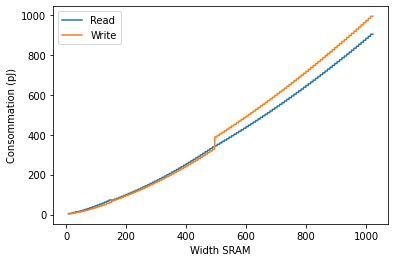

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(sram_list_width, sram_width_result_read, label="Read")
plt.plot(sram_list_width, sram_width_result_write, label="Write")
plt.ylabel("Consommation (pJ)")
plt.legend(loc = "upper left")
plt.xlabel("Width SRAM")
plt.show()
plt.savefig("a1.jpg")

In [8]:
sram_list_depth= range(1024, 16384, 10)
sram_depth_result_read = []
sram_depth_result_write = []
for i in tqdm(range(len(sram_list_depth))):
    YAML_generator(dram_width_default, sram_list_depth[i], 64,
                  regfile_depth_default, regfile_width_default, datawidth_default, default_path)
    os.system(command)
    result_read, result_write, other = YAML_parser(2)
    sram_depth_result_read.append(result_read)
    sram_depth_result_write.append(result_write)

100%|███████████████████████████████████████| 1536/1536 [10:17<00:00,  2.49it/s]


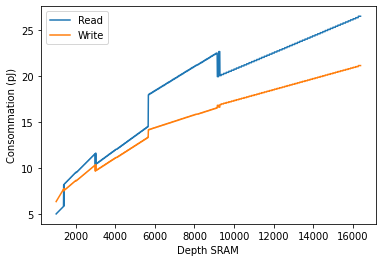

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(sram_list_depth, sram_depth_result_read, label="Read")
plt.plot(sram_list_depth, sram_depth_result_write, label="Write")
plt.ylabel("Consommation (pJ)")
plt.legend(loc = "upper left")
plt.xlabel("Depth SRAM")
plt.show()
plt.savefig("a2.jpg")

## b)

In [10]:
regfile_list_width = range(8, 1024, 2)
regfile_width_result_read = []
regfile_width_result_write = []
for i in tqdm(range(len(regfile_list_width))):
    YAML_generator(dram_width_default, sram_depth_default, sram_width_default,
                  16384, regfile_list_width[i], datawidth_default, default_path)
    os.system(command)
    result_read, result_write, other = YAML_parser(0)
    regfile_width_result_read.append(result_read)
    regfile_width_result_write.append(result_write)

100%|█████████████████████████████████████████| 508/508 [01:36<00:00,  5.26it/s]


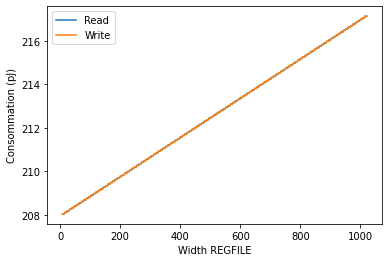

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(regfile_list_width, regfile_width_result_read, label="Read")
plt.plot(regfile_list_width, regfile_width_result_write, label="Write")
plt.ylabel("Consommation (pJ)")
plt.legend(loc = "upper left")
plt.xlabel("Width REGFILE")
plt.show()
plt.savefig("b1.jpg")

In [12]:
regfile_list_depth = range(1024, 16384, 10)
regfile_depth_result_read = []
regfile_depth_result_write = []
for i in tqdm(range(len(regfile_list_depth))):
    YAML_generator(dram_width_default, sram_depth_default, sram_width_default,
                  regfile_list_depth[i], 64, datawidth_default, default_path)
    os.system(command)
    result_read, result_write, other = YAML_parser(0)
    regfile_depth_result_read.append(result_read)
    regfile_depth_result_write.append(result_write)

100%|███████████████████████████████████████| 1536/1536 [13:38<00:00,  1.88it/s]


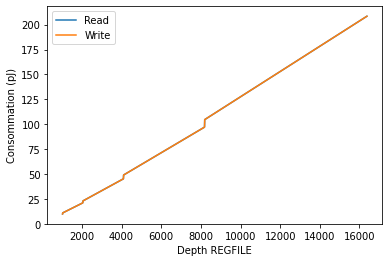

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(regfile_list_depth, regfile_depth_result_read, label="Read")
plt.plot(regfile_list_depth, regfile_depth_result_write, label="Write")
plt.ylabel("Consommation (pJ)")
plt.legend(loc = "upper left")
plt.xlabel("Depth REGFILE")
plt.show()
plt.savefig("b2.jpg")

## c)

In [14]:
dram_list_depth = range(8, 1024, 2)
dram_depth_result_read = []
dram_depth_result_write = []
for i in tqdm(range(len(dram_list_depth))):
    YAML_generator(dram_list_depth[i], sram_depth_default, sram_width_default,
                  regfile_depth_default, regfile_width_default, datawidth_default, default_path)
    os.system(command)
    result_read, result_write, other = YAML_parser(3)
    dram_depth_result_read.append(result_read)
    dram_depth_result_write.append(result_write)

100%|█████████████████████████████████████████| 508/508 [01:10<00:00,  7.24it/s]


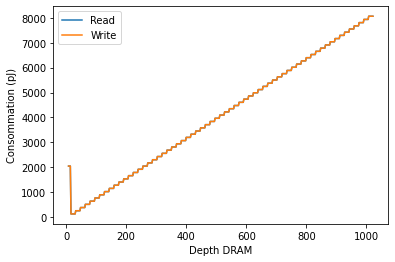

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(dram_list_depth, dram_depth_result_read, label="Read")
plt.plot(dram_list_depth, dram_depth_result_write, label="Write")
plt.ylabel("Consommation (pJ)")
plt.legend(loc = "upper left")
plt.xlabel("Depth DRAM")
plt.show()
plt.savefig("c.jpg")

## d)

In [16]:
mac_list_depth = range(2, 64)
mac_random_list = []
mac_reused_list = []
mac_gated_list = []
for i in tqdm(range(len(mac_list_depth))):
    YAML_generator(dram_width_default, sram_depth_default, sram_width_default,
                  regfile_depth_default, regfile_width_default, mac_list_depth[i], default_path)
    os.system(command)
    mac_random, mac_reused, mac_gated = YAML_parser(1)
    mac_random_list.append(mac_random)
    mac_reused_list.append(mac_reused)
    mac_gated_list.append(mac_gated)

100%|███████████████████████████████████████████| 62/62 [00:33<00:00,  1.86it/s]


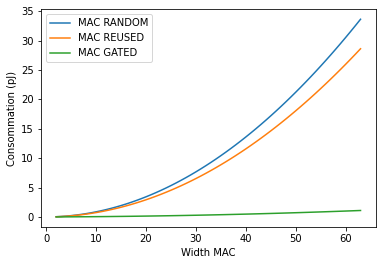

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(mac_list_depth, mac_random_list, label="MAC RANDOM")
plt.plot(mac_list_depth, mac_reused_list, label="MAC REUSED")
plt.plot(mac_list_depth, mac_gated_list, label="MAC GATED")
plt.ylabel("Consommation (pJ)")
plt.legend(loc = "upper left")
plt.xlabel("Width MAC")
plt.show()
plt.savefig("d.jpg")